<a href="https://colab.research.google.com/github/ZenCodex559/Student_Dropout/blob/main/Student_DropOut_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This dataset contains data from a higher education institution on various variables related to undergraduate students, including demographics, social-economic factors, and academic performance, to investigate the impact of these factors on student dropout and academic success

*   Marital status: The marital status of the student. (Categorical)


* Application mode: The method of application used by the student. (Categorical)
* Application order: The order in which the student applied. (Numerical)
* Course: The course taken by the student. (Categorical)
* Daytime/evening attendance: Whether the student attends classes during the day or in the evening. (Categorical)
* Previous qualification: The qualification obtained by the student before enrolling in higher education. (Categorical)
* Nacionality: The nationality of the student. (Categorical)
* Mother's qualification: The qualification of the student's mother. (Categorical)
* Father's qualification: The qualification of the student's father. (Categorical)
* Mother's occupation: The occupation of the student's mother. (Categorical)
* Father's occupation: The occupation of the student's father. (Categorical)
* Displaced: Whether the student is a displaced person. (Categorical)
* Educational special needs: Whether the student has any special educational needs. (Categorical)
* Debtor: Whether the student is a debtor. (Categorical)
* Tuition fees up to date: Whether the student's tuition fees are up to date. (Categorical)
* Gender: The gender of the student. (Categorical)
* Scholarship holder: Whether the student is a scholarship holder. (Categorical)
* Age at enrollment: The age of the student at the time of enrollment. (Numerical)
* International: Whether the student is an international student. (Categorical)
* Curricular units 1st sem (credited): The number of curricular units credited by the student in the first semester. (Numerical)
* Curricular units 1st sem (enrolled): The number of curricular units enrolled by the student in the first semester. (Numerical)
* Curricular units 1st sem (evaluations): The number of curricular units evaluated by the student in the first semester. (Numerical)
* Curricular units 1st sem (approved): The number of curricular units approved by the student in the first semester. (Numerical)

In [89]:
# Importing module
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Adding data for analysis
file_path = '/content/drive/MyDrive/Project/Student_DropOut/dataset.csv'
df = pd.read_csv(file_path)

## Checking data set

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
# Checking unque values
for elem in df:
  print(f'{elem}:{df[elem].unique()}')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [6]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [8]:
student = df.iloc[:,[7,8,9,10,11,12,13,14,15,16,17,18,32,33,34]]

In [9]:
student

,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Inflation rate,GDP,Target
0,13,10,6,10,1,0,0,1,1,0,20,0,1.4,1.74,Dropout
1,1,3,4,4,1,0,0,0,1,0,19,0,-0.3,0.79,Graduate
2,22,27,10,10,1,0,0,0,1,0,19,0,1.4,1.74,Dropout
3,23,27,6,4,1,0,0,1,0,0,20,0,-0.8,-3.12,Graduate
4,22,28,10,10,0,0,0,1,0,0,45,0,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,5,0,0,0,1,1,0,19,0,2.8,-4.06,Graduate
4420,1,1,10,10,1,0,1,0,0,0,18,1,0.6,2.02,Dropout
4421,22,27,10,10,1,0,0,1,0,1,30,0,-0.3,0.79,Dropout
4422,22,27,8,5,1,0,0,1,0,1,20,0,-0.8,-3.12,Graduate


In [10]:
relocate = student["Displaced"].value_counts()
relocate

1    2426
0    1998
Name: Displaced, dtype: int64

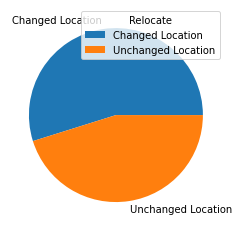

In [11]:
plt.figure(figsize=(4, 4))
plt.pie(relocate,labels= ['Changed Location','Unchanged Location'])
plt.legend(title = "Relocate")
plt.show()

## Student tuitation fees analysis

In [12]:
tuition_fees = student['Tuition fees up to date'].value_counts()
tuition_fees

1    3896
0     528
Name: Tuition fees up to date, dtype: int64

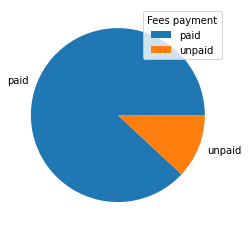

In [13]:
plt.pie(tuition_fees,labels=['paid','unpaid'])
plt.legend(title = 'Fees payment')
plt.show()

In [14]:
gender = student['Gender'].value_counts()
gender

0    2868
1    1556
Name: Gender, dtype: int64

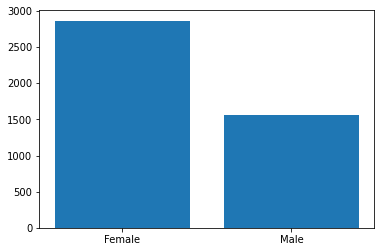

In [15]:
plt.figure(figsize=(6, 4))
plt.bar(x = ['Female','Male'],height = gender)
plt.legend = 'Gender'
plt.show()

## Student scholarshop analysis

In [23]:
# Student scholership
scholarship = student['Scholarship holder'].value_counts()
scholarship

0    3325
1    1099
Name: Scholarship holder, dtype: int64

In [71]:
scholarship_eligible_girls = student[(student['Scholarship holder']==1) & (student['Gender']==0)]['Gender'].count()
scholarship_eligible_girls

867

In [72]:
scholarship_eligible_boys = student[(student['Scholarship holder']==1) & (student['Gender']==1)]['Gender'].count()
scholarship_eligible_boys

232

In [73]:
# Percentage of Girls who got scholarship
per_of_eligible_girls = scholarship_eligible_girls*100/(scholarship_eligible_girls+scholarship_eligible_boys)
print(round(per_of_eligible_girls,2))

78.89


In [74]:
# Percentage of Boys who got scholarship
per_of_eligible_boys = scholarship_eligible_boys*100/(scholarship_eligible_girls+scholarship_eligible_boys)
print(round(per_of_eligible_boys,2))

21.11


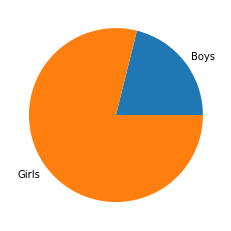

In [81]:
# Pie chart of Scholarship eligible students
ab = per_of_eligible_boys,per_of_eligible_girls
plt.pie(ab,labels=['Boys','Girls'])
plt.show()

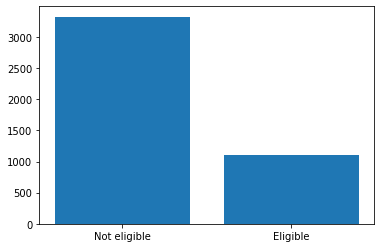

In [24]:
# Total % of students eligible for scholarship
plt.bar(x=['Not eligible','Eligible'],height=scholarship)
plt.show()

In [47]:
max_age = student['Age at enrollment'].max()
max_age

70

In [82]:
max_age_graduate = student[student['Target']=='Graduate']['Age at enrollment'].sort_values().tail()
max_age_graduate

3756    58
1532    59
707     60
2867    60
2959    62
Name: Age at enrollment, dtype: int64

In [86]:
min_age_graduate = student[student['Target']=='Dropout']['Age at enrollment'].head().min()
min_age_graduate

18

In [87]:
# Number student who graduate after age of 30
student[(student['Target']=='Graduate') & (student['Age at enrollment']>=30)]['Target'].count()

236

## Checking relation between columns

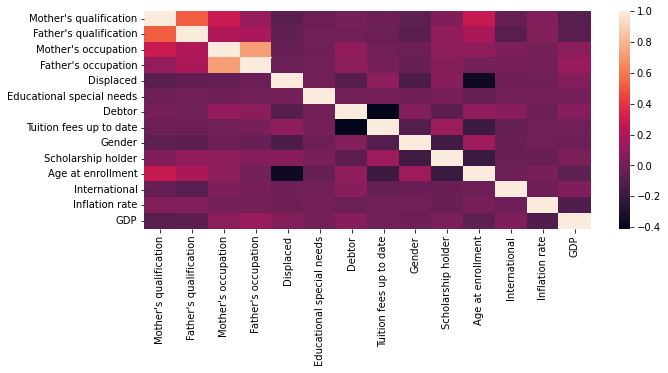

In [94]:
# Corelation between the data frame
plt.figure(figsize=(10, 4))
sns.heatmap(student.corr())
plt.show()

### Positively corelated columns

* Father occupation-mother Occupation
* fathers qualification-mothers qualification

## Negatively corelated columns

* displaced-Age at enrollment
* Tuition fees upto date-debtor

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


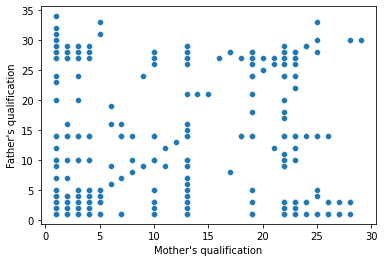

In [100]:
# Fathers qualification vs Mother's qualification
sns.scatterplot(student["Mother's qualification"],student["Father's qualification"])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


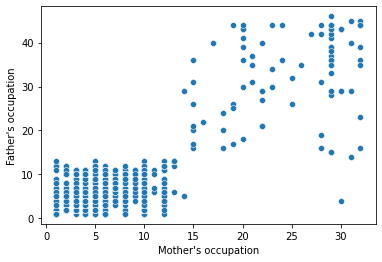

In [97]:
sns.scatterplot(student["Mother's occupation"],student["Father's occupation"])
plt.show()